                                                    RANDOM FOREST                                                              

Random forest is an ensemble algorithm used to solve the overfitting or bagging problems.

A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. In classification tasks, a random forest aggregates the predictions of multiple trees to make a final prediction, usually through majority voting. In regression tasks, it averages the outputs of the trees.

Random Forest Construction:-
1. Building Multiple Decision Trees: A random forest consists of several decision trees, each trained on a different subset of the data and a different subset of features.

    - Bootstrap Sampling: 
        - For each tree in the forest, a random sample is taken from the training dataset with replacement. This sampling technique is called bootstrap sampling, and it means some data points may appear multiple times in the sample, while others may be left out.
        - Each decision tree is trained on its unique bootstrap sample, making each tree slightly different.

    - Random Feature Selection:
        - At each split in each tree, a random subset of features is selected, and the best split among these features is chosen to create the split.
        - This randomness helps reduce correlation between trees, making the forest less prone to overfitting and improving generalization.

2. Constructing Individual Decision Trees: Each tree in a random forest is constructed like a standard decision tree:
    - The algorithm looks for the best split based on the randomly selected features and creates branches to split the data recursively.
    - Each tree is grown to a set depth, or it can be allowed to grow until it has pure leaf nodes (i.e., where all data points in a leaf node belong to the same class).
    - No pruning is applied to individual trees in random forests; they are allowed to grow as deep as possible, which often increases model variance. However, combining the predictions of all the trees reduces the variance, making the overall model more robust.

3. Aggregating the Predictions: Once all the trees are trained, the random forest makes predictions by aggregating the output of each tree:
    - For Classification:
        - Each tree makes a class prediction, and the final class is determined by majority voting (i.e., the class with the most votes).
    - For Regression:
        - Each tree makes a numerical prediction, and the final output is the average of all the tree predictions.


Parameters in a Random Forest:- 

The main parameters to tune in a random forest model are:

1. n_estimators: The number of trees in the forest. More trees generally improve accuracy but increase computation time.
2. max_features: The number of features to consider when looking for the best split at each node. Common values are "sqrt" (square root of total features) for classification, or "auto" (same as the total number of features) for regression.
3. max_depth: The maximum depth of each tree. Limiting depth can help prevent overfitting.
4. min_samples_split: The minimum number of samples required to split an internal node. Higher values make the model simpler and reduce overfitting.
5. min_samples_leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, it controls the tree’s complexity.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

In [3]:
raw_data =  pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\Housing_Data.csv")
raw_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
cleanedDataset = raw_data.drop(columns=['Address'])
cleanedDataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [5]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [6]:
cleanedDataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [7]:
cleanedDataset.notnull().count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
dtype: int64

In [8]:
cleanedDataset.shape

(5000, 6)

In [9]:
cleanedDataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: >

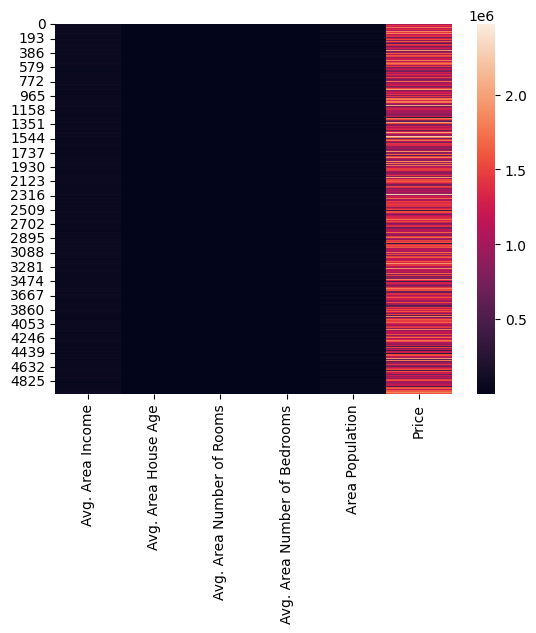

In [10]:
sns.heatmap(cleanedDataset)

Working with new dataset for Classification problems

In [34]:
raw_data_2 = pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\Classified_Data.csv")
raw_data_2

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [35]:
cleanedDataset_classific = raw_data_2.drop(columns=['Unnamed: 0'])

Splitting training and testing data

In [14]:
x = cleanedDataset.iloc[:, :-1]
y = cleanedDataset['Price']

In [38]:
x_classific = cleanedDataset_classific.iloc[:, :-1]
y_classific = cleanedDataset_classific['TARGET CLASS']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [39]:
x_train_classific, x_test_classific, y_train_classific, y_test_classific = train_test_split(x_classific, y_classific, test_size=0.8, random_state=42)

Making Random forest models

In [16]:
RandomForest_Model = RandomForestRegressor(n_estimators= 100, max_features=x.shape[1], max_depth=3, random_state=0)
RandomForest_Model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, max_features=5, random_state=0)

In [ ]:
RandomForestClassification_Model = RandomForestClassifier(n_estimators= 200, max_features=x_classific.shape[1], max_depth=3, random_state=0)
RandomForestClassification_Model.fit(x_train_classific, y_train_classific)

RandomForestClassifier(max_depth=3, max_features=10, n_estimators=200,
                       random_state=0)

In [17]:
predications = RandomForest_Model.predict(x_test)
predications

array([1310133.17414508, 1234257.85005502, 1284816.36338891, ...,
        905809.08715069, 1261293.13802504, 1108501.12458873])

In [18]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3335    1.749820e+06
1920    9.951372e+05
3715    1.110932e+06
4646    9.850593e+05
946     1.285158e+06
Name: Price, Length: 4000, dtype: float64

In [44]:
predications_classific = RandomForestClassification_Model.predict(x_test_classific)
predications_classific

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [47]:
y_test_classific

521    0
737    1
740    1
660    1
411    0
      ..
619    1
855    1
803    1
645    1
846    0
Name: TARGET CLASS, Length: 800, dtype: int64

Metrics Evalution

In [19]:
print("Accuracy: (regression taks)", round((1 - metrics.mean_absolute_percentage_error(y_test, predications))*100, 2))
print("MAE: (regression task)", round(metrics.mean_absolute_error(y_test, predications)))

Accuracy: (regression taks) 82.6
MAE: (regression task) 169640


In [46]:
print("Accuracy: (classification taks)", round(metrics.accuracy_score(y_test_classific, predications_classific)*100, 2))

Accuracy: (classification taks) 90.62
